# Model Evaluation and Refinement on a Used Cars Pricing Dataset

## Set Up

In [ ]:
# install libs
%pip install pandas numpy micropip scikit-learn

In [103]:
# import libs
import pandas as pd
import numpy as np
import micropip
await micropip.install("seaborn")
import matplotlib.pyplot as plt

await micropip.install(["ipywidgets"], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

## Utils

In [104]:
import requests as re

def download(url, filename):
    response = re.get(url)
    if response.status_code == 200:
        with open(filename, "w") as f:
            f.write(response.text)

In [105]:
# functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [106]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 6
    height = 4
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Data Import

In [107]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
file_name = "datasets/raw/auto_eval.csv"
download(url, file_name)

In [108]:
df = pd.read_csv(file_name, header=0)

# we are gonna use only numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [109]:
# remove columns that dont provide any value to the model
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Training and Testing

In [110]:
y_data = df['price'] # dependent variable: Price
x_data = df.drop('price',axis=1) # independent variables: all the numeric columns

from sklearn.model_selection import train_test_split

# split 90-10: 90% for training and 10% for test, with a seed = 1
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])



number of test samples : 21
number of training samples: 180


In [111]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train) # training with only one variable independent
r2_test = lre.score(x_test[['horsepower']], y_test) # r2 in test data: general error
r2_train = lre.score(x_train[['horsepower']], y_train) # r2 in training data: fit error

print("r2 in test data:", r2_test)
print("r2 in training data:", r2_train)
print("We can see the R^2 is much smaller using the test data compared to the training data")

r2 in test data: 0.36358755750788263
r2 in training data: 0.6619724197515104
We can see the R^2 is much smaller using the test data compared to the training data


In [112]:
## if we work with 60-40: 60 for training and 40 for test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre_1=LinearRegression()
lre_1.fit(x_train1[['horsepower']],y_train1)
r2_test_1 = lre_1.score(x_test1[['horsepower']],y_test1)
r2_train_1 = lre_1.score(x_train1[['horsepower']], y_train1)

print("r2 in test data:", r2_test_1)
print("r2 in training data:", r2_train_1)
print("We can see the R^2 is larger using the test data compared to the training data")

r2 in test data: 0.7139364665406973
r2 in training data: 0.5754067463583004
We can see the R^2 is larger using the test data compared to the training data


## Cross Validation
Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

### Cross Validation Score

In [113]:
from sklearn.model_selection import cross_val_score

# evaluate the r2 for each cross validation with the 4 folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) # 4 folds
Rcross # shows the R^2 of each cross validation

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [114]:
# We can calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


In [115]:
# We can use negative squared error as a score 
# by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.7224759 ])

In [116]:
# if we only work with 2 folds for the cross validation
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
print(Rc)
Rc.mean()

[0.59015621 0.44319613]


0.5166761697127429

### Cross Validation Predict
You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [117]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Over fitting, Under fitting and Model Selection 
It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is over fitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore over fitting in that context

### In Multiple Linear Regression

In [118]:
# train the model with the 4 variables independents
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

# predict values using the in sample data (training)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# predict values using the out of sample data(test)
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

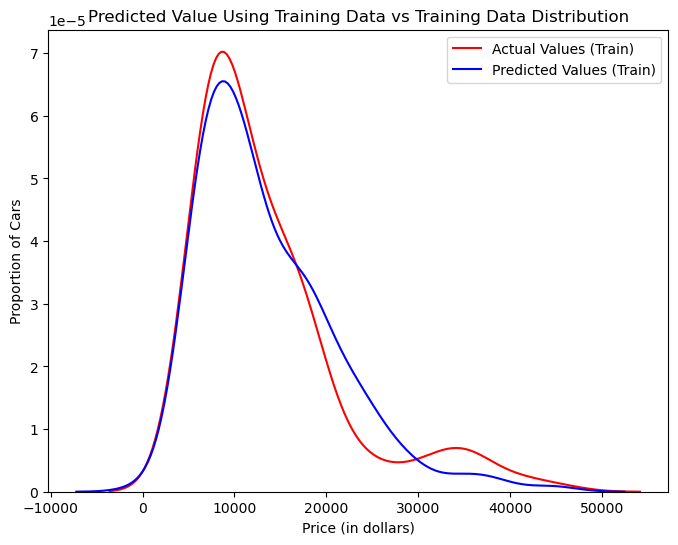

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
Title = 'Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far, the model seems to be doing well in learning from the training dataset.

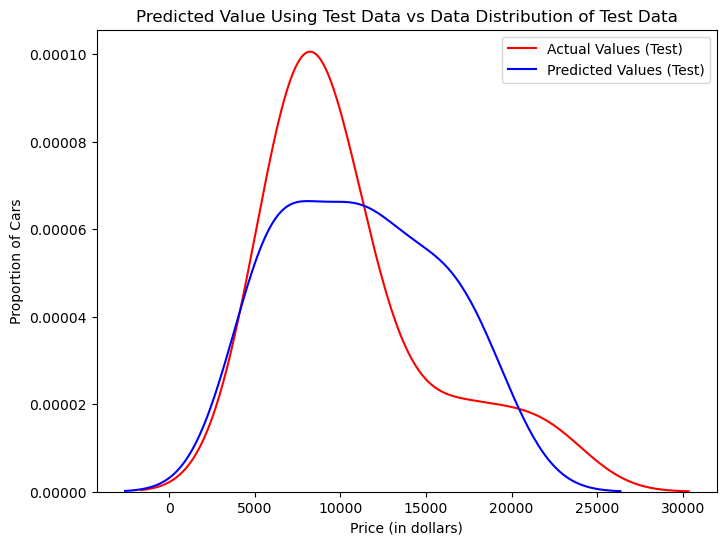

In [120]:
Title='Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15000. 
This is where the shape of the distribution is extremely different.

### Overfitting

#### In Polynomial Regression of only one variable

In [121]:
from sklearn.preprocessing import PolynomialFeatures
# split data 55-45
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
#
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [122]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.58615619  7307.91973653 12213.73734432 18893.37966315]
True values: [ 6295. 10698. 13860. 13499.]


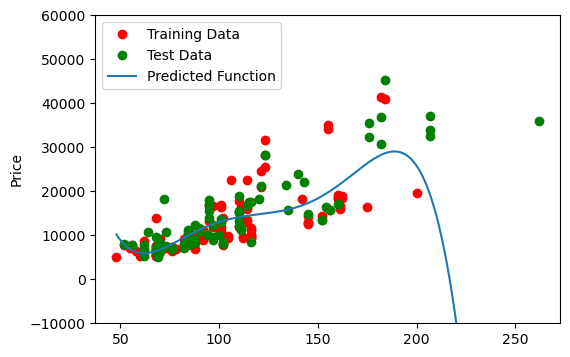

In [123]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [124]:
print("R^2 of the training data:", poly.score(x_train_pr, y_train))
print("R^2 of the test data:", poly.score(x_test_pr, y_test))

R^2 of the training data: 0.5567716897727109
R^2 of the test data: -29.870994900857237


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. **A negative R^2 is a sign of overfitting.**

Text(3, 0.75, 'Maximum R^2 ')

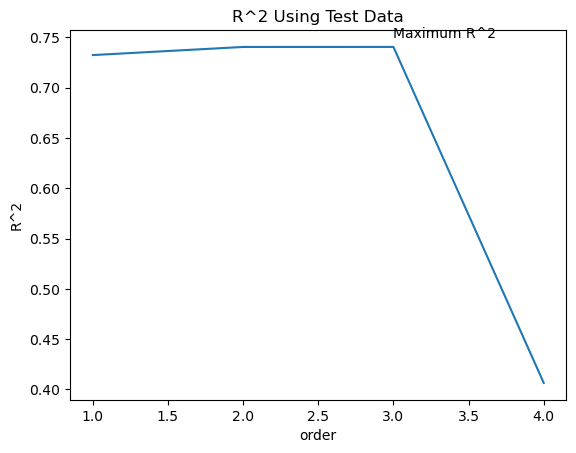

In [125]:
#### Evaluating how the R^2 changes for different order polynomials
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [126]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [127]:
w = interact_manual(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))
display(w)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

#### In Polynomial Regression with more than one feature

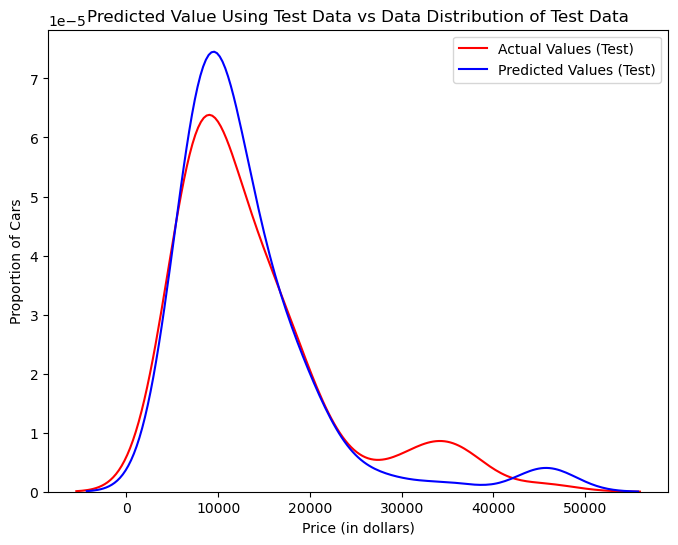

In [128]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

poly1=LinearRegression().fit(x_train_pr1,y_train)

yhat_test1=poly1.predict(x_test_pr1)
Title='Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

### Ridge Regression
We will review Ridge Regression and see how the parameter alpha changes the model. 

for the review, our test data will be used as validation data.

In [129]:
# Train a degree two polynomial transformation
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [130]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=1) # use the hyperparameter alpha with a value of 1
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [131]:
# import library for progress bar
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000)) # from 0 to 10000 with steps of 10
pbar = tqdm(Alpha)

for a in pbar:
    RigeModel = Ridge(alpha=a) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:02<00:00, 497.94it/s, Test Score=0.564, Train Score=0.859]


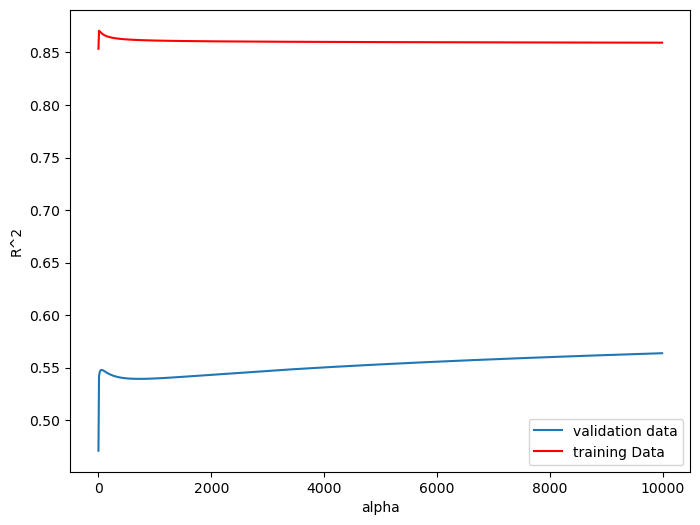

In [132]:
# We can plot out the value of R^2 for different alphas:
width = 8
height = 6
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

### Grid Search
The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

#### With only alpha hyperparameter

In [133]:
# import the module
from sklearn.model_selection import GridSearchCV

# dictionary of hyper parameters
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# Create a Ridge regression object
RR=Ridge()

# Create the ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4) # pass the regression object, hyperparameters and folds

# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [134]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

# the r-squared is close to 1, it represent a good fit

0.8411649831036148